## CNN

차원 축소하지 않은 데이터 사용

In [380]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, initializers
from keras.optimizers import RMSprop, Adadelta, Adam, SGD, Adagrad
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import pickle # 파이썬 객체저장을 위한 모듈

## 사전값 셋팅 확인 필수

In [384]:
df = 'core'   # 수정필수
# core/all/main




# core설정시 확인해야 함
# R을 통해 확인한 stepwise 유의 변수 리스트
core_factors = ['DR00000136','6000201001O0','6000903016D1','FNMKFN02','6000901002D1','S41000210FD1',
'6000207003O0','DR00000052','6000906001D6','DR00000156','6000901001D3','DR00000082',
'S41000210FD2','6000902001D2','6000908001D3','6000904001D3','6000908001D2','S41B0D1009O0',
'6000901002D3','6000903001D2','6000403001O0','CO10100170O0','DR00000113','6000908001D7']

#  키별로 비율 배분이 잘 됐는지 확인
if df == 'all':
    max_idx = 707
else:
    max_idx = 124
    

## 데이터셋 셋팅

In [385]:
import pickle # 파이썬 객체저장을 위한 모듈

# 파이썬 객체 읽어오기

if df == 'all':
    with open('./pickles/data6vs4_all.p', 'rb') as file:    # hello.txt 파일을 바이너리 읽기 모드(rb)로 열기
        temp_train_set = pickle.load(file)
        temp_test_set = pickle.load(file)
        af_cols = pickle.load(file)
else:
    with open('./pickles/data6vs4_main.p', 'rb') as file:    # hello.txt 파일을 바이너리 읽기 모드(rb)로 열기
        temp_train_set = pickle.load(file)
        temp_test_set = pickle.load(file)
        af_cols = pickle.load(file)


In [387]:
train_set = temp_train_set.drop(['index', 0, max_idx-1,max_idx],axis=1)  # 열삭제
test_set = temp_test_set.drop(['index', 0, max_idx-1,max_idx],axis=1)  # 열삭제
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((755, 702), (755,), (333, 702), (333,))

In [388]:
# 항목명 (열명) 셋팅
factor_cols = list(af_cols[1:-2])
train_set.columns = factor_cols
test_set.columns = factor_cols
train_set.head()

,key,industry,label,6000903001D1,6000902001D1,6000909001D1,6000904001D3,6000901001D1,6000908001O0,3001104004O0,...,DR00000054,DR00000108,DR00000162,DR00000056,DR00000110,DR00000164,S410001300D1,S41000210FD2,S430000600D2,S410001300D2
0,2017217190,C,0,2.09981,0.270822,-0.500636,0,21.7127,22.1255,2.96982,...,0,0,0,0,0,1,2.25459,-2.21916,2.66396,0.420925
1,2016097870,C,0,0.827262,1.07435,0.772678,1,21.7263,22.1281,2.96982,...,0,0,0,0,0,0,2.25459,-1.13276,2.66396,0.420925
2,2015115610,C,0,1.0853,1.07435,-0.199992,1,21.7158,22.1272,2.96982,...,0,0,0,0,0,1,2.25459,1.15384,2.66396,0.420925
3,2017093050,C,0,2.09981,1.07435,0.190371,0,22.0504,22.1439,2.96982,...,0,0,0,0,0,0,2.40525,1.04229,0.267563,2.26534
4,2013005030,C,0,2.09981,1.75398,-0.23022,1,21.7209,22.1258,2.96982,...,0,0,1,0,0,1,2.25459,-0.61853,2.66396,0.420925


In [391]:
# core인 경우 main에서 핵심 변수만 추림

if df == 'core':
    final_factors = ['key', 'industry', 'label']
    final_factors = final_factors + core_factors
    train_set = train_set[final_factors]
    test_set = test_set[final_factors]
else:
    pass

In [392]:
df, train_set.shape, test_set.shape

('core', (755, 27), (333, 27))

In [393]:
train_set.head()

,key,industry,label,DR00000136,6000201001O0,6000903016D1,FNMKFN02,6000901002D1,S41000210FD1,6000207003O0,...,6000908001D3,6000904001D3,6000908001D2,S41B0D1009O0,6000901002D3,6000903001D2,6000403001O0,CO10100170O0,DR00000113,6000908001D7
0,2017217190,C,0,0,0.487848,-0.235578,0,-0.290843,-1.72044,1.49886,...,-0.666377,0,15.2478,0.525266,0.245382,-0.270822,2.04451,0.204754,0,1
1,2016097870,C,0,0,1.80987,0.746976,0,0.0773512,-1.19475,1.49886,...,0.386142,1,13.645,0.525266,-0.227257,-1.07435,2.04451,0.277946,0,0
2,2015115610,C,0,0,1.80987,0.315955,0,0.0773512,0.97075,1.49886,...,0.21561,1,12.515,0.689667,-0.227257,-1.07435,2.04451,0.543432,0,0
3,2017093050,C,0,0,1.80987,0.532843,0,0.0773512,0.349584,1.49886,...,0.234092,0,16.0119,0.525266,-0.227257,-1.07435,2.04451,0.543432,0,0
4,2013005030,C,0,1,1.80987,-0.189984,0,-1.32118,-0.445309,1.49886,...,-0.108716,1,14.827,0.525266,0.245382,-1.75398,0.980221,0.543432,0,1


### 데이터 분리 및 타입변경

In [394]:
# 데이터 분리
cols = train_set.columns.values
train_info = train_set[cols[0:3]]
x_train = train_set[cols[3:]]
y_train = train_set['label']
train_len = x_train.shape[0]

cols = test_set.columns.values
test_info = test_set[cols[0:3]]
x_test = test_set[cols[3:]]
y_test = test_set['label']
test_len = x_test.shape[0]

In [395]:
x_train.shape, y_train.shape

((755, 24), (755,))

In [396]:
x_train = np.array(x_train)
x_test = np.array(x_test)

### 모델 입력값 설정

In [397]:
np.random.seed(42)

# 분류갯수
classes = 2

# 학습데이터
img_rows = 1
img_cols = x_train.shape[1] 



In [398]:
img_rows, img_cols

(1, 24)

### input shape 변경

In [399]:
# X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
# X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1], 1) # (1, # of features, # of chnnels) # input.shape[1:끝]
X_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1], 1) # (1, # of features, # of chnnels) # input.shape[1:끝]

# 변수명 전환
Y_train = y_train
Y_test = y_test

input_shape= X_train.shape[1:4]
print(input_shape)

(1, 24, 1)


In [400]:
x_train.shape[1]

24

In [401]:
if x_train.shape[1] >= 100:
    filter_size = 32
elif x_train.shape[1] >= 50:
    filter_size = 8
else:
    filter_size = input_shape[1]/2


In [402]:
# Y값을 1개항목에서 카테고리화 함
Y_train = to_categorical(y_train, num_classes=classes) # one-hot 인코딩
Y_test = to_categorical(y_test, num_classes=classes) # one-hot 인코딩

Y_train.shape, Y_test.shape

((755, 2), (333, 2))

## CNN 모델 설계

In [403]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((755, 1, 24, 1), (333, 1, 24, 1), (755, 2), (333, 2))

In [404]:
filter_size = 4

In [405]:


# 1. 모델구성
model = Sequential()

model.add(Conv2D(filter_size, (1, 4), input_shape = X_train.shape[1:4], activation = 'elu', padding='same')) # 2D (1, 4) size 필터
model.add(Activation('relu'))

model.add(Conv2D(filter_size, (1, 4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((1, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filter_size, (1, 4), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(filter_size, (1, 4)))
model.add(Activation('relu'))
model.add(MaxPooling2D((1, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(classes, activation = 'softmax'))# 마지막 class 분류

# 2. 모델 학습과정 설정하기
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


# 3. 모델 학습시키기
hist = model.fit(X_train, Y_train, batch_size = 500, epochs = 100, verbose = 1, validation_split = .2)



Train on 604 samples, validate on 151 samples
Epoch 1/100
604/604 [==============================] - 2s 4ms/step - loss: 0.6291 - acc: 0.6209 - val_loss: 0.9776 - val_acc: 0.0000e+00
Epoch 2/100
604/604 [==============================] - 0s 83us/step - loss: 0.6096 - acc: 0.6275 - val_loss: 1.0260 - val_acc: 0.0000e+00
Epoch 3/100
604/604 [==============================] - 0s 83us/step - loss: 0.5948 - acc: 0.6573 - val_loss: 1.0680 - val_acc: 0.0000e+00
Epoch 4/100
604/604 [==============================] - 0s 114us/step - loss: 0.5893 - acc: 0.6788 - val_loss: 1.1019 - val_acc: 0.0000e+00
Epoch 5/100
604/604 [==============================] - 0s 94us/step - loss: 0.6109 - acc: 0.6738 - val_loss: 1.1300 - val_acc: 0.0000e+00
Epoch 6/100
604/604 [==============================] - 0s 78us/step - loss: 0.5908 - acc: 0.6987 - val_loss: 1.1527 - val_acc: 0.0000e+00
Epoch 7/100
604/604 [==============================] - 0s 142us/step - loss: 0.5925 - acc: 0.6904 - val_loss: 1.1718 - val_acc

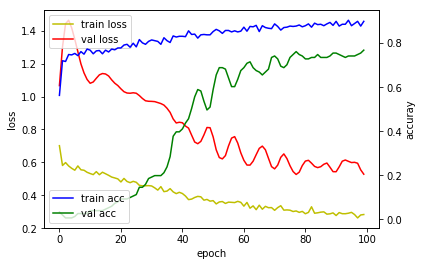

755/755 [==============================] - 1s 682us/step
Train score: 0.3102
Train accuracy: 0.8768
333/333 [==============================] - 0s 674us/step
Test score: 0.3203
Test accuracy: 0.8829


In [376]:

# 4. 학습과정 살펴보기(그래프)
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


# 5. 모델 평가하기 - 테스트셋
'''
score는 비용함수에 대한 평가값
'''

score = model.evaluate(X_train, Y_train, verbose=1)
print('Train score: {:.4f}'.format(score[0]))
print('Train accuracy: {:.4f}'.format(score[1]))


score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score: {:.4f}'.format(score[0]))
print('Test accuracy: {:.4f}'.format(score[1]))

# model.evaluate ; 손실 값을 계산하는 데 사용
# model.predict_classes() ; 범주 출력을 계산하는 데 사용
# model.predict_proba() ; 범주 확률을 계산하는 데 사용


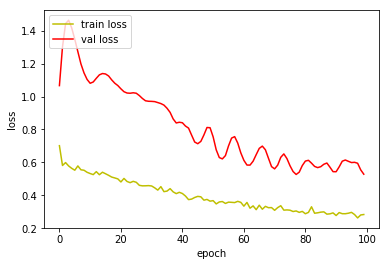

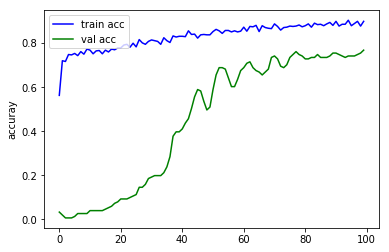

In [379]:

# 5. 분리된 그래프

# loss
fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

# accuray
fig, acc_ax = plt.subplots()

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuray')

acc_ax.legend(loc='upper left')

plt.show()


In [378]:
X_train.reshape(-1,X_train.shape[2])

array([[10.243702775436176, 2.9698172583599223, 2.8813154498533837, ...,
        1.0, 0.0, 0.0],
       [11.308235592314265, 2.9698172583599223, 2.8813154498533837, ...,
        0.0, 0.0, 0.0],
       [10.79655059829098, 2.9698172583599223, 2.8813154498533837, ...,
        1.0, 0.0, 0.0],
       ...,
       [10.737374458155466, 2.9698172583599223, 2.8813154498533837, ...,
        1.0, 0.0, 3.0],
       [10.872750169176388, 2.9698172583599223, 2.8813154498533837, ...,
        3.0, 0.0, 0.0],
       [10.236955280137042, 2.9698172583599223, 2.8813154498533837, ...,
        2.0, 0.0, 0.0]], dtype=object)

In [ ]:
# 사용한 데이터 검증용 (엑셀 전환 후 비교)

In [80]:
x_train_df = pd.DataFrame(X_train.reshape(-1,X_train.shape[2]))
x_test_df = pd.DataFrame(X_test.reshape(-1,X_test.shape[2]))
y_train_df = pd.DataFrame(Y_train)
y_test_df = pd.DataFrame(Y_test)

In [86]:
train_list = [train_info,y_train_df, x_train_df]
test_list = [test_info,y_test_df, x_test_df]

result_train = pd.concat(train_list,axis=1) 
result_test = pd.concat(test_list,axis=1) 

# 파일 생성
result_train.to_csv('./datas/train_check.csv')
result_test.to_csv('./datas/test_check.csv')

In [89]:
cols = train_set.columns.values
cols[3:]

array(['DR00000136', '6000201001O0', '6000903016D1', 'FNMKFN02',
       '6000901002D1', 'S41000210FD1', '6000207003O0', 'DR00000052',
       '6000906001D6', 'DR00000156', '6000901001D3', 'DR00000082',
       'S41000210FD2', '6000902001D2', '6000908001D3', '6000904001D3',
       '6000908001D2', 'S41B0D1009O0', '6000901002D3', '6000903001D2',
       '6000403001O0', 'CO10100170O0', 'DR00000113', '6000908001D7'],
      dtype=object)